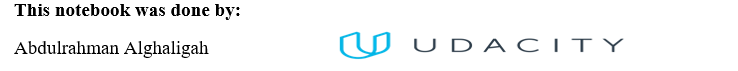

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

## Business Understanding 

1- What is the famous programming language according to 2019 Stackoverflow survey?  <br>
2- What are the top 5 countries that pay for programmers   <br>
3- Is money related to satisfaction in the top 5 countries?  <br> 


## Data Understanding 


## Gather data

In [2]:
df_2019=pd.read_csv('developer_survey_2019/developer_survey_2019.csv')# Read the dataset
df_schema= pd.read_csv('developer_survey_2019/survey_results_schema.csv')# Read the dataset

In [3]:
df_2019.head(3)# printing first 3 rows

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult


## Assess Data

In [4]:
df_2019.shape #printing the rows and the columns of the dataframe

(88883, 85)

In [5]:
df_2019.describe() # Stastical analysis of the data

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [6]:
df_2019.isnull().sum() # how many null inside the any column?

Respondent          0
MainBranch        552
Hobbyist            0
OpenSourcer         0
OpenSource       2041
                ...  
Sexuality       12736
Ethnicity       12215
Dependents       5824
SurveyLength     1899
SurveyEase       1802
Length: 85, dtype: int64

## Question 1: What are the most used programming languages according to 2019 Stackoverflow survey? 

### Clean Data

In [7]:
df_2019['LanguageWorkedWith'] # printing LanguageWorkedWith column

0                          HTML/CSS;Java;JavaScript;Python
1                                      C++;HTML/CSS;Python
2                                                 HTML/CSS
3                                      C;C++;C#;Python;SQL
4              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
                               ...                        
88878                        HTML/CSS;JavaScript;Other(s):
88879                                                  NaN
88880                                                  NaN
88881                                                  NaN
88882    Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...
Name: LanguageWorkedWith, Length: 88883, dtype: object

In [8]:
df_2019['LanguageWorkedWith'].isnull().sum() # how many nulls in LanguageWorkedWith column?

1314

In [9]:
df_1=df_2019.dropna(subset=['LanguageWorkedWith']) # drop any null coluumn

As we want to see all the languages that used by programmers we have to drop any null value because it would be useless if we kept them

In [10]:
df_1['LanguageWorkedWith'].isnull().sum()# Check if all  null is dropped

0

### Data Modelling 

In [11]:
def split_column(df, column):
    '''
    Split column by ;,
    Then Returns a splited series.
    '''
    df_copy = df
    columnSeries = df_copy[column].apply(lambda x: x.split(';'))
    return columnSeries

In [12]:
languages=split_column(df_1,'LanguageWorkedWith') # split to make every language alone

In [13]:
languages

0                     [HTML/CSS, Java, JavaScript, Python]
1                                  [C++, HTML/CSS, Python]
2                                               [HTML/CSS]
3                                [C, C++, C#, Python, SQL]
4        [C++, HTML/CSS, Java, JavaScript, Python, SQL,...
                               ...                        
88875                         [HTML/CSS, Java, JavaScript]
88876                       [HTML/CSS, JavaScript, Python]
88877    [Bash/Shell/PowerShell, Go, HTML/CSS, JavaScri...
88878                    [HTML/CSS, JavaScript, Other(s):]
88882    [Bash/Shell/PowerShell, HTML/CSS, Java, JavaSc...
Name: LanguageWorkedWith, Length: 87569, dtype: object

In [14]:
#Just Flating a nested list
def flat(array_list):
    '''
    Flat a nested list,
    Then Returns a flat list.
    '''
    object_list = []
    for row in array_list:
        for obj in row:
            object_list.append(obj.strip())
            
    return object_list

In [15]:
unique_list=flat(languages) # flat the list to make every language alone

In [16]:
def list_of_group(data_list):
    '''
    Group by count to a list,
    Returns a result dict
    '''
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value} for key, value in grouped_list.items()]
    return grouped_dict

In [17]:
dict_languages_used=list_of_group(unique_list) # count how many record for every language 

In [18]:
df_answer1=pd.DataFrame(dict_languages_used) # convert the list to a dataframe

In [19]:
top_5=df_answer1.sort_values(by=['Count'],ascending=False).head(5) # printing the firat five rows with decending order

In [20]:
top_5

,Programming Language,Count
2,JavaScript,59219
0,HTML/CSS,55466
7,SQL,47544
3,Python,36443
1,Java,35917


In [21]:
top_5.reset_index(inplace=True) 


In [22]:
top_5.drop(columns='index',axis=1,inplace=True)

In [23]:
top_5.set_index('Programming Language',inplace=True)

### Data Visualization

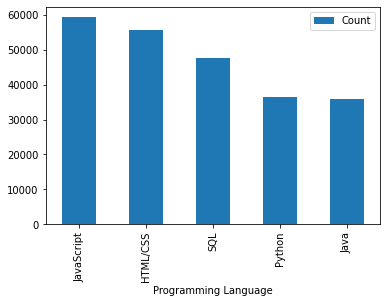

In [24]:
top_5.plot(kind='bar');

### Conclusion: <br>
<li> We can easily see that  JavaScript is the most used language 
<li> By looking to the languages we assume that the top responders seems to be web devlopers

# Question 2 : What are the top 5 countries that pay for programmers?

### Clean Data

In [25]:
df_2019.columns # printing all the columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [26]:
def column_descripton(column_name):
    ''''
    Input: Column inside Stackoverflow dataset,
    Output: The description of the columns. 
    '''
    return df_schema[df_schema['Column']==column_name].QuestionText

In [27]:
column_descripton('ConvertedComp')

31    Salary converted to annual USD salaries using ...
Name: QuestionText, dtype: object

In [28]:
column_descripton('CompFreq')

30    Is that compensation weekly, monthly, or yearly?
Name: QuestionText, dtype: object

In [29]:
df_2019['CompFreq'].value_counts()

Yearly     31505
Monthly    29057
Weekly      2706
Name: CompFreq, dtype: int64

As Converted Comp column is already converted to dollar and it is in Annual income so we can use it directly

In [30]:
df_salary=df_2019[df_2019['ConvertedComp'].isnull()==False]  # dropping null values 

I dropped null value to insure that the we take the average without counting rows that has nulls in salary

In [31]:
needed_columns= [
    'Respondent','Country','CompTotal','CompFreq','ConvertedComp'
] 

In [32]:
df_salary=df_salary[needed_columns] # taking the nedded columns

In [33]:
df_salary

,Respondent,Country,CompTotal,CompFreq,ConvertedComp
2,3,Thailand,23000.0,Monthly,8820.0
3,4,United States,61000.0,Yearly,61000.0
5,6,Canada,40000.0,Monthly,366420.0
8,9,New Zealand,138000.0,Yearly,95179.0
9,10,India,950000.0,Yearly,13293.0
...,...,...,...,...,...
88325,88878,United States,130000.0,Yearly,130000.0
88326,88879,Finland,6000.0,Monthly,82488.0
88328,88881,Austria,60000.0,Yearly,68745.0
88329,88882,Netherlands,42768.0,Monthly,588012.0


### Data modeling

In [34]:
df_salary

,Respondent,Country,CompTotal,CompFreq,ConvertedComp
2,3,Thailand,23000.0,Monthly,8820.0
3,4,United States,61000.0,Yearly,61000.0
5,6,Canada,40000.0,Monthly,366420.0
8,9,New Zealand,138000.0,Yearly,95179.0
9,10,India,950000.0,Yearly,13293.0
...,...,...,...,...,...
88325,88878,United States,130000.0,Yearly,130000.0
88326,88879,Finland,6000.0,Monthly,82488.0
88328,88881,Austria,60000.0,Yearly,68745.0
88329,88882,Netherlands,42768.0,Monthly,588012.0


In [35]:
df_salary['ConvertedComp']=df_salary['ConvertedComp']

In [36]:
df_salary

,Respondent,Country,CompTotal,CompFreq,ConvertedComp
2,3,Thailand,23000.0,Monthly,8820.0
3,4,United States,61000.0,Yearly,61000.0
5,6,Canada,40000.0,Monthly,366420.0
8,9,New Zealand,138000.0,Yearly,95179.0
9,10,India,950000.0,Yearly,13293.0
...,...,...,...,...,...
88325,88878,United States,130000.0,Yearly,130000.0
88326,88879,Finland,6000.0,Monthly,82488.0
88328,88881,Austria,60000.0,Yearly,68745.0
88329,88882,Netherlands,42768.0,Monthly,588012.0


In [37]:
df_salary=df_salary[df_salary['ConvertedComp']!=0.0]

In [38]:
df_coutry_avg_pay=df_salary.groupby('Country')['ConvertedComp'].mean() # taking the average of each country

In [39]:
df_coutry_avg_pay=df_coutry_avg_pay.sort_values(ascending=False)[:5] # sorting the rows 


### Data Visualization

<AxesSubplot:xlabel='Country'>

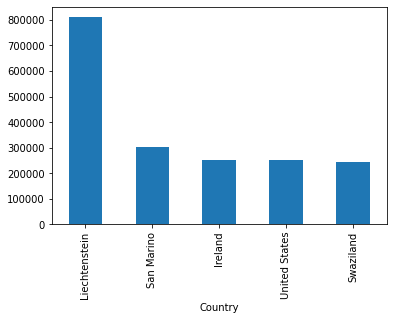

In [40]:
df_coutry_avg_pay.plot(kind='bar')


### Conclusion <br>
<li> The top 5 countries that have the highest average salary according to the survey are Liechtenstein, San Marino, Ireland, the United States and Swaziland

# Question 3 : Is money related to satisfaction in the top 5 countries?

# Data modeling

In [41]:
df_sats=df_2019[df_2019['JobSat'].isnull()==False] # dropping nulls

I dropped null because It is useless to keep any rows that we don't know the satisfaction status of its employee

In [42]:
df_sats_top5=df_sats[(df_sats.Country == 'Liechtenstein')| (df_sats.Country == 'San Marino')|
                     (df_sats.Country == 'Ireland')| (df_sats.Country == 'United States')|(df_sats.Country == 'Swaziland')]
# Taking the record from the top 5 countries 

In [43]:
Columns=[
    'Country','JobSat'
]

In [44]:
df_sats_top5=df_sats_top5[Columns] # taking only the nedded columns

In [45]:
df_sats_top5=df_sats_top5.groupby('JobSat').count()# Groupping the record according to the sats

In [46]:
df_sats_top5

,Country
JobSat,
Neither satisfied nor dissatisfied,1580
Slightly dissatisfied,2347
Slightly satisfied,5713
Very dissatisfied,1063
Very satisfied,7321


### Data Visualization

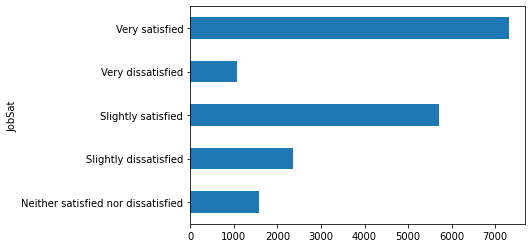

In [47]:
df_sats_top5.plot(kind='barh',legend=False);


### Conclusion <br>
<li>By looking at the results we can see that the salary is related to the employee satisfaction
<li> It seems that the salary has a huge impact on the employees satisfaction